In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [141]:
df = pd.read_excel('Dados.xlsx')

In [142]:
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [143]:
df.index

RangeIndex(start=0, stop=46, step=1)

In [138]:
df.isnull().sum()

Data      0
Vendas    0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [149]:
from statsmodels.tsa.arima_model import ARIMA

df = df.set_index(pd.DatetimeIndex(df['Data'], freq='D'))


# Ajustar o modelo SARIMA
model = sm.tsa.SARIMAX(df['Vendas'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Fazer as previsões

pred = model_fit.get_prediction(start=pd.to_datetime('today'), end=pd.to_datetime('today') + pd.DateOffset(days=5), dynamic=False)
pred_conf = pred.conf_int()

# Imprimir as previsões
print(pred.predicted_mean)

2023-02-04     772.820669
2023-02-05    1043.308907
2023-02-06     964.214438
2023-02-07     895.804024
2023-02-08     903.455957
2023-02-09    1020.996368
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\Paulo Faria\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


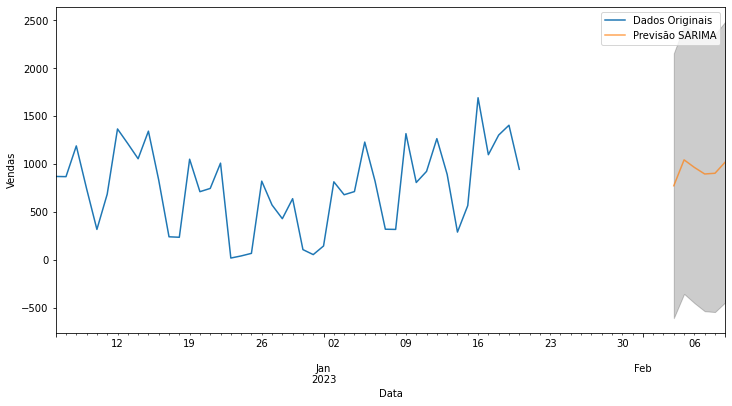

In [155]:
# Plotar o gráfico com matplot
ax = df['Vendas'].plot(label='Dados Originais', figsize=(12, 6))
pred.predicted_mean.plot(ax=ax, label='Previsão SARIMA', alpha=.7)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()

plt.show()


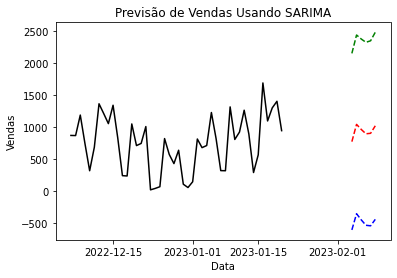

In [157]:
# Plotar o gráfico usando o seaborn
sns.lineplot(data=df['Vendas'], color='black')
sns.lineplot(x=pred.predicted_mean.index, y=pred.predicted_mean, color='red', linestyle='--')
sns.lineplot(x=pred_conf.index, y=pred_conf['lower Vendas'], color='blue', linestyle='--')
sns.lineplot(x=pred_conf.index, y=pred_conf['upper Vendas'], color='green', linestyle='--')

plt.title('Previsão de Vendas Usando SARIMA')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()